In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Resuelva con Riemman y Montecarlo

\begin{equation}
f(x,y)=\frac{1}{\pi}e^{-(x-4)²-y²}
\end{equation}


In [2]:
limites=np.array([[-3,6],[-4.5,4.5]])

f = lambda r: 1/np.pi*np.exp(-(r[0]-4)**2-r[1]**2)

### Distribución Uniforme

In [22]:
def MC_U(f,limites,N):  #Función de Montecarlo
    sum_1=0
    sum_2=0
    
    Dimension=len(limites)
    for M in range(N):
        a=limites[:,0]
        b=limites[:,1]
        rj=np.random.rand(Dimension)*(b-a)+a  #np.random da valores de (0,1) 
        
        sum_1+=f(rj) 
        sum_2+=f(rj)**2
        
    f_prom1=sum_1/N
    f_prom2=sum_2/N
    
    prod=1
    for x in limites:
        prod*=(x[1]-x[0])
        
    error=((f_prom1**2+f_prom2)/N)**.5*prod
        
    return (f_prom1*prod,error)

In [24]:
print('El valor de la integral con una distribusion uniforme \n ')
for N in (10**2,10**3,10**4):
    print('para N=%d integral= %.5f, error=%.5f' %(N, MC_U(f,limites,N)[0], MC_U(f,limites,N)[1]))


El valor de la integral con una distribusion uniforme 
 
para N=100 integral= 1.20798, error=0.42891
para N=1000 integral= 0.99309, error=0.11176
para N=10000 integral= 1.05230, error=0.03760


### Distribución normal

In [29]:
def MC_N(f,limites,N):  #Función de Montecarlo
    sum_1=0
    sum_2=0
    
    rj_list=[]
    Dimension=len(limites)
    for M in range(N):
        a=limites[:,0]
        b=limites[:,1]
        rj=np.random.normal(size=(Dimension),loc=(b-a)*.5+a)  #np.random da valores de (0,1) 
        
        rj_list.append(rj)
        
        sum_1+=f(rj) 
        sum_2+=f(rj)**2
        
    f_prom1=sum_1/N
    f_prom2=sum_2/N
    
    prod=1
    for x in limites:
        prod*=(x[1]-x[0])
        
    error=((f_prom1**2+f_prom2)/N)**.5*prod
        
    return (f_prom1*prod,error)

In [ ]:
## Con Sumas de Rienman 
def DoubleRieman(f,a,b,c,d,N):

    dx=(b-a)/N
    dy=(d-c)/N
    ny=np.arange(c,d,dy)
    nx=np.arange(a,b,dx)
    
    sumx=0
    for j in nx:
        sumy = 0
        for i in ny:
            sumy+=f(np.array([i,j]))*dy

        sumx+=sumy*dx
        
    error=abs(1-sumx)/1

    return sumx, error

In [34]:
print('El valore de la integral con una distribución normal \n ')
for N in (10**2,10**3,10**4):
    print('Para N=%d integral= %.5f +- %.5f' %(N, MC_N(f,limites,N)[0], MC_N(f,limites,N)[1]))

El valore de la integral con una distribución normal 
 
Para N=100 integral= 0.95623 +- 0.32292
Para N=1000 integral= 1.07672 +- 0.10457
Para N=10000 integral= 1.03092 +- 0.03452


In [28]:
print('El valor de la integral con sumas de riemman')
print(DoubleRieman(f,-3,6,-4.5,4.5,1000))

El valor de la integral con sumas de riemman


NameError: name 'DoubleRieman' is not defined

##  2) Obtenga las dinamicas en el espacio fase de una partícula de masa m=1 para 

### Harmonic Potential

\begin{equation}
V_{H}(x)=\frac{1}{2}\omega^2 x^2
\end{equation}

### Morse Potential
\begin{equation}
V_{M}(x)=D(1-e^{-ax})^2
\end{equation}

#### La ecuacion diferencial que se resuelve es $m\frac{d^2x}{dt^2} = -\frac{dV(x)}{dx}$

In [10]:
omega=.972
D=15
a=.18

def VH(t,y):  #Potencial armónico
    x=y[0]
    vx=y[1]
    
    dvxdt=-omega**2*x # F=d2x/dt2=-dVdx   dV/dx=w^2x (derivada del potencial)

    return np.array([vx,dvxdt]) 

def VM(t,y):  #Potencial Morse
    x=y[0]
    v=y[1]
    
    dvdt=-2*a*D*(1-np.exp(-a*x))*np.exp(-a*x) 
    return np.array([v,dvdt])

### Con Runge-Kutta

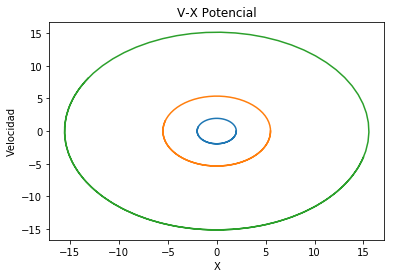

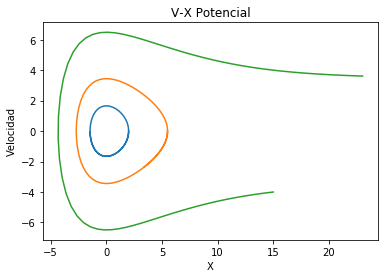

In [11]:
#Condición inicial
y0=[[2,0],[5.5,0],[15,-4]]

#Intérvalo de solución
t_ini=0.0
t_end=10
#Número de puntos en los que se encontrará la solución (no incluye IC)
N=100

#Tamaño de paso
h=(t_end-t_ini)/N

t_array=[]
for i in range(0,N+1):
    ti=t_ini+i*h
    t_array.append(ti)


def rk4(func,t,y):
    k1=func(t,y)
    k2=func(t+0.5*h , y+0.5*h*k1)
    k3=func(t+0.5*h , y+0.5*h*k2)
    k4=func(t+h,y+h*k3)
    
    value=y+h/6*(k1+2*k2+2*k3+k4)
    
    return value


for func in (VH,VM):
    sol=[np.zeros((N+1,3)) for i in range(3)]
    v=[np.zeros(N+1) for i in range(3)]
    for j in range(3):

        sol[j][0][0]=t_array[0]
        sol[j][0][1]=y0[j][0]
        sol[j][0][2]=y0[j][1]


        for i in range(1,N+1):
            sol[j][i][0]=t_array[i]
            sol[j][i][1]=rk4(func,sol[j][i-1][0],[sol[j][i-1][1],sol[j][i-1][2]])[0]
            sol[j][i][2]=rk4(func,sol[j][i-1][0],[sol[j][i-1][1],sol[j][i-1][2]])[1]

    fig=plt.figure()
    ax=plt.axes()
    ax.plot(sol[0][:,1],sol[0][:,2])
    ax.plot(sol[1][:,1],sol[1][:,2])
    ax.plot(sol[2][:,1],sol[2][:,2])
    ax.set_ylabel("Velocidad")
    ax.set_xlabel("X")
    plt.title('V-X Potencial')

### Con LeapFrog

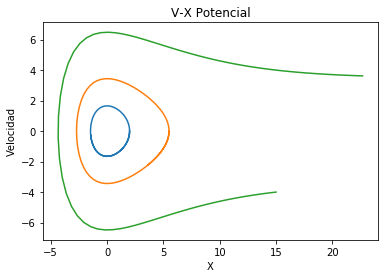

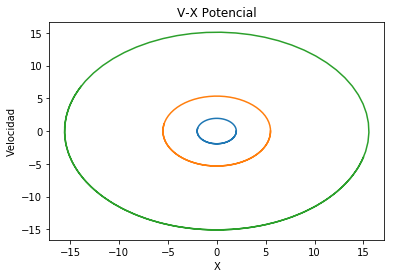

In [12]:
#Define función F(x)
def dVHdt(x):
    value=-omega**2*x
    return value

def dVMdt(x):
    value=-2*a*D*(1-np.exp(-a*x))*np.exp(-a*x)
    return value

time=[]
for i in np.arange(t_ini,t_end,h):
    time.append(i)
time=np.array(time)

#Rutina principal
def leapfrog(F,t,y):
    x=y[0]
    v=y[1]
    v_half=v+0.5*h*F(x)
    x_next=x+h*v_half
    v_next=v_half+0.5*h*F(x_next)
    return np.array([x_next,v_next])

for func in (dVMdt,dVHdt):
        #Solución leapfrog
    sol_leapfrog=[np.zeros((len(time),2)) for i in range(3)]

    for j in range(3):    
        sol_leapfrog[j][0][0]=y0[j][0]
        sol_leapfrog[j][0][1]=y0[j][1]

        for i in range(1,len(time)): #La condición inicial no se involucra
            sol_leapfrog[j][i][0]=leapfrog(func,time[i-1],sol_leapfrog[j][i-1])[0]
            sol_leapfrog[j][i][1]=leapfrog(func,time[i-1],sol_leapfrog[j][i-1])[1]

    fig=plt.figure()
    ax=plt.axes()
    ax.plot(sol_leapfrog[0][:,0],sol_leapfrog[0][:,1])
    ax.plot(sol_leapfrog[1][:,0],sol_leapfrog[1][:,1])
    ax.plot(sol_leapfrog[2][:,0],sol_leapfrog[2][:,1])
    ax.set_ylabel("Velocidad")
    ax.set_xlabel("X")
    plt.title('V-X Potencial')